# Models interpretation notebook

In [168]:
from utils import prepare_data_for_pltm, read_data
import numpy as np
import pickle

### Preparing data for mcta model

In [169]:
prepare_data_for_pltm()

Added txt files of ted files to ./data/preprocessed/ted
Added txt files of twitter files to ./data/preprocessed/twitter


### Interpreting mcta results

#### Ted en-ru

In [82]:
with open("./results/mcta_twitter_30_en_ru_anchors1.txt", "r") as f:
    anchors_en = f.read().replace("[", "").replace("]", "").replace(" ", "").split(",")
with open("./results/mcta_twitter_30_en_ru_anchors2.txt", "r") as f:
    anchors_ru = f.read().replace("[", "").replace("]", "").replace(" ", "").split(",")

with open("./results/mcta_twitter_30_en_fr_anchors1.txt", "r") as f:
    anchors_en = f.read().replace("[", "").replace("]", "").replace(" ", "").split(",")
with open("./results/mcta_twitter_30_en_fr_anchors2.txt", "r") as f:
    anchors_fr = f.read().replace("[", "").replace("]", "").replace(" ", "").split(",")

In [84]:
with open("./data/dicts/ind_maps_twitter_en_ru.pkl", 'rb') as f:
    ind_maps_en_ru = pickle.load(f)

with open("./data/dicts/ind_maps_twitter_en_fr.pkl", 'rb') as f:
    ind_maps_en_fr = pickle.load(f)
    
en_map = ind_maps_en_ru[0]
ru_map = ind_maps_en_ru[1]

en_ru_map_inds_EN = {en_map[i]:i for i in list(en_map.keys())}
en_ru_map_inds_RU = {ru_map[i]:i for i in list(ru_map.keys())}

en_map = ind_maps_en_fr[0]
fr_map = ind_maps_en_fr[1]

en_fr_map_inds_EN = {en_map[i]:i for i in list(en_map.keys())}
en_fr_map_inds_FR = {fr_map[i]:i for i in list(fr_map.keys())}

In [85]:
import numpy as np
A1_en_fr_EN = np.load("./results/mcta_twitter_30_en_fr_A1.npy").transpose()
A2_en_fr_FR = np.load("./results/mcta_twitter_30_en_fr_A2.npy").transpose()

In [86]:
A1_en_ru_EN = np.load("./results/mcta_twitter_30_en_ru_A1.npy").transpose()
A2_en_ru_RU = np.load("./results/mcta_twitter_30_en_ru_A2.npy").transpose()

In [127]:
top_words_topics_en_fr_EN = [[en_fr_map_inds_EN[i] for i in A1_en_fr_EN[topic].argsort()[-50:][::-1]] 
                             for topic in range(30)]
top_words_topics_en_fr_FR = [[en_fr_map_inds_FR[i] for i in A2_en_fr_FR[topic].argsort()[-50:][::-1]] 
                             for topic in range(30)]

top_words_topics_en_ru_EN = [[en_ru_map_inds_EN[i] for i in A1_en[topic].argsort()[-50:][::-1]] 
                             for topic in range(30)]
top_words_topics_en_ru_RU = [[en_ru_map_inds_EN[i] for i in A1_en[topic].argsort()[-50:][::-1]] 
                             for topic in range(30)]

In [192]:
top_words_topics_twitter = [top_words_topics_en_fr_EN, top_words_topics_en_fr_FR, top_words_topics_en_ru_RU]

In [236]:
from scipy.stats.stats import pearsonr
np.mean([pearsonr(np.sort(A1_en_fr_EN[i])[-100:], np.sort(A2_en_fr_FR[i])[-100:])[0] for i in range(30)])

0.9214492483198764

In [237]:
np.mean([pearsonr(np.sort(A1_en_fr_EN[i])[-100:], np.sort(A2_en_fr_FR[i])[-100:])[1] for i in range(30)])

6.384977343724049e-21

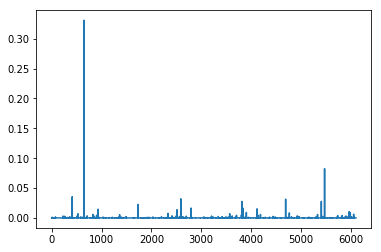

In [277]:
plt.plot(A1_en_fr_EN[1])

In [273]:
A1_en_fr_EN[0]

array([0.        , 0.        , 0.        , ..., 0.04019918, 0.06240983,
       0.13899992])

# PLTM on ted

про технологии

In [158]:
text = "pron people internet world medium write online thing book lot page day google web start talk information read video de un à gens internet personne site plus y monde faire pouvoir chose ligne photo livre écrire quelque page компьютер данные информация использовать создавать технология делать алгоритм машина видео новый видеть мир робот устройство объект а движение камера"

про меньшинства

In [161]:
text = "woman man pron girl sex black mother love boy young female talk gender baby male daughter family laughter gay un femme lui de homme fille à ne mère rires noir sexe jeune dire garçon sexuel parler al mariage свой смех видеть дело самый работа самец думать самка машина черный аплодисменты использовать проводить называть происходить животное чувствовать реальность"

про биологические данные

In [164]:
text = "cell body gene dna make life human molecule bacteria genetic tissue material biology organism genome protein cancer chemical form un de cellule pouvoir à lui corps adn gène vie humain se génétique bactérie utiliser molécule organisme tissu petit давать робот помощь сделать видеть мир большой фильм использовать система место смех общество работать случай свой поэтому пример"

про урбанистические проблемы

In [187]:
text = "energy car water oil power make fuel percent climate nuclear carbon problem year gas cost waste plastic electricity light de un à énergie voiture eau plus problème utiliser pouvoir pétrole pourcent nucléaire devoir électricité produire émission plastique carbone город здание место новый проект дом создавать улица сделать идея построить городской голос местный работа йорк центр транспорт район"

# PLTM on twitter

про вырубку лесов

In [181]:
text = "indigenous fight stand protect forest community savetheamazon message amazon continue brazil sign happen petition solidarity protection attack de à un cantine matin plus nouveau végétarien local h produit repas soutien proposer lui végéàlacantin scolaire passer venir парк кусково вырубка москва дерево место самый ситуация собянин пожарный новость зеленый помощь тысяча московский сообщать обсуждать фото уничтожать"

interaction of gov and eco activists

In [183]:
text = "make government city vote state life health put call read join weather limit risk infrastructure mondaymotivation affect king total récif forage l public large menacer prendre brésil pétrole un campagne гринпис нумто спч угроза решение экология требовать генпрокуратура заповедник подписывать добровольный путь берег пожарный вырубка отправлять проверка проходить огонь"

призыв к активизму

In [185]:
text = "climate change today action world climatestrike youth strike student country back fridaysforfuture demand happen young act school leader stand de à se climat climatique ne urgence devoir loi france transport e entrer mobilité l laffairedusiecle bien engagement compte аэс плавучий москва петербург gt дерево район акция реактор проводить запуск петиция запускать центр вводить призывать режим санкт делать"

In [189]:
text = "pron global planet protect year home human specie good polluter forest kill act industry committee speech put insect international de un à plus al devant dernier année dont toujours européen plusieurs toxique environnement patagonie compagnie vouloir étude pétrole пакет а одноразовый пластиковый свалка отказываться пластик собирать использовать предлагать власть газета час потребление бумага читать решать ссылка порвиспакет"

# MTAnchor: twitter

 1 - no plastic
 4 - support of activist activity
 5 - climate strikes

In [225]:
n_topic = 9
text = [top_words_topics_twitter[0][n_topic], 
        top_words_topics_twitter[1][n_topic], 
        top_words_topics_twitter[2][n_topic]]
text = " ".join([d for words in text for t in text for d in t])

# MTAnchor: ted

In [241]:
text = " buy paper make sell money brand store dollar lie product business coffee box pay trust put guy market un de rires acheter vendre produit dollar argent papier new non voici marque magasin café al bien prix payer  сделать слово вопрос дизайн часть должный  сторона форма идея"

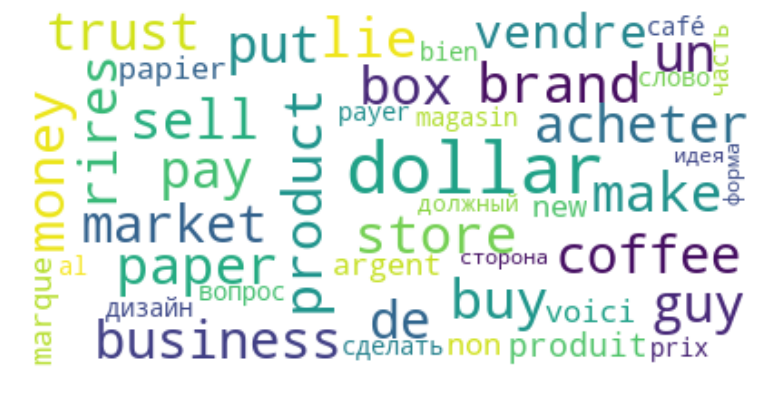

In [242]:
import wordcloud
from matplotlib import pyplot as plt


stopwords = ["pron", "rt", "gt", "in", "of", "at", "from", "by", "this", "an", 
             "as", "the", "and", "with", "will", "on", "but", 'to']

# Create and generate a word cloud image:
wordcloud = wordcloud.WordCloud(stopwords=stopwords, max_font_size=40, max_words=55, background_color="white").generate(text)

plt.figure(figsize=(13,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()